In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Life expectancy.csv to Life expectancy.csv


**GENERATE DATA**

In [3]:
df = pd.read_csv('Life expectancy.csv')

In [4]:
df

,Entity,Year,Life expectancy
0,Australia,1802,34.049999
1,Australia,1803,34.049999
2,Australia,1804,34.049999
3,Australia,1805,34.049999
4,Australia,1806,34.049999
...,...,...,...
3248,United States,2012,78.940002
3249,United States,2013,78.959999
3250,United States,2014,78.940002
3251,United States,2015,78.870003


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entity           3253 non-null   object 
 1   Year             3253 non-null   int64  
 2   Life expectancy  3253 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.4+ KB


In [56]:
df.duplicated().value_counts()

False    3253
dtype: int64

In [57]:
df.describe()

,Year,Life expectancy
count,3253.000000,3253.000000
mean,1908.066093,48.680380
std,62.613962,17.965669
min,1800.000000,8.108836
25%,1854.000000,32.000000
50%,1908.000000,41.880001
75%,1962.000000,66.820000
max,2016.000000,83.940002


In [55]:
df.corr()

,Year,Life expectancy
Year,1.000000,0.843842
Life expectancy,0.843842,1.000000


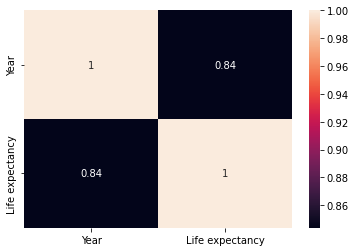

In [59]:
sns.heatmap(data = df.corr(),annot=True)

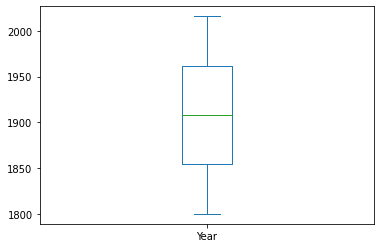

In [60]:
df['Year'].plot.box()

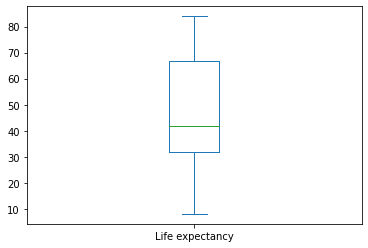

In [61]:
df['Life expectancy'].plot.box()

In [5]:
data = df.loc[(df['Entity'] == 'Russia') & (df['Year'] > 1866)]
data = data.reset_index(drop=True)

In [6]:
data

,Entity,Year,Life expectancy
0,Russia,1867,29.573458
1,Russia,1868,27.851233
2,Russia,1869,27.934912
3,Russia,1870,31.120827
4,Russia,1871,28.103025
...,...,...,...
145,Russia,2012,70.449997
146,Russia,2013,70.760002
147,Russia,2014,70.860001
148,Russia,2015,70.830002


**Generate Data**

In [7]:
x = data['Year']
x

0      1867
1      1868
2      1869
3      1870
4      1871
       ... 
145    2012
146    2013
147    2014
148    2015
149    2016
Name: Year, Length: 150, dtype: int64

In [8]:
y = data['Life expectancy']
y

0      29.573458
1      27.851233
2      27.934912
3      31.120827
4      28.103025
         ...    
145    70.449997
146    70.760002
147    70.860001
148    70.830002
149    70.870003
Name: Life expectancy, Length: 150, dtype: float64

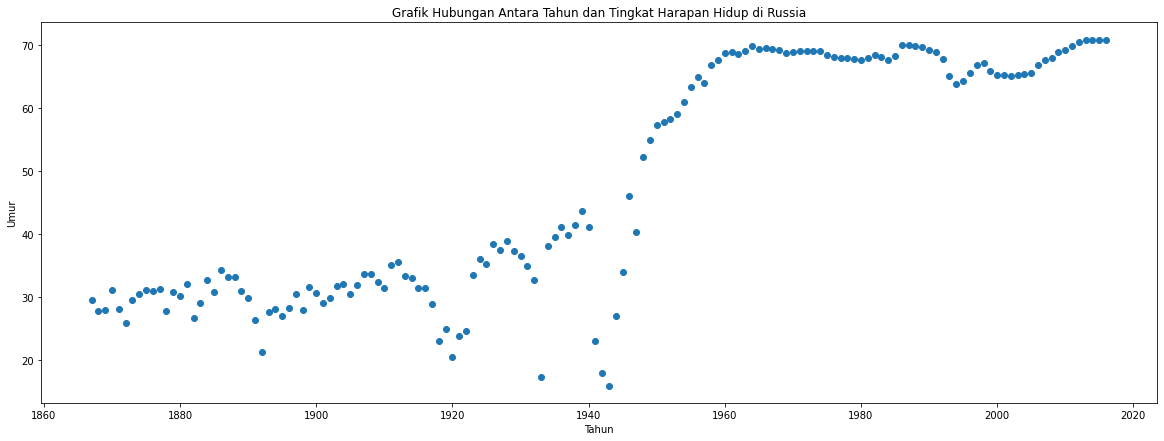

In [76]:
plt.figure(figsize=(20,7))
plt.xlabel("Tahun")
plt.ylabel("Umur")
plt.title("Grafik Hubungan Antara Tahun dan Tingkat Harapan Hidup di Russia")

plt.scatter(x,y)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


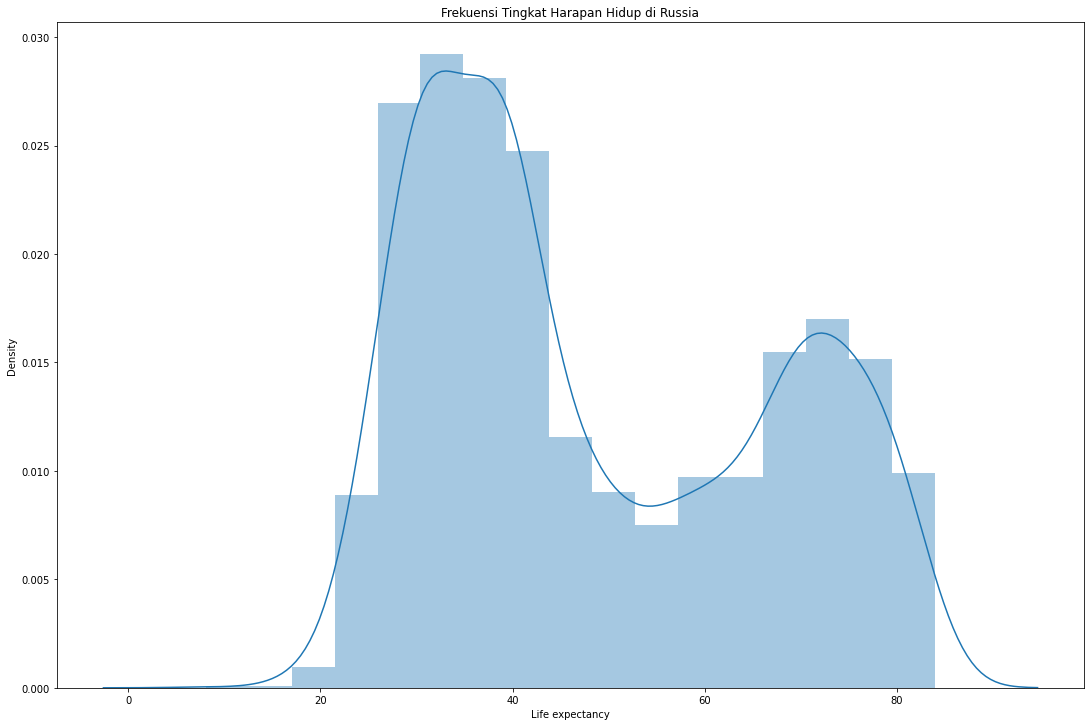

In [71]:
plt.figure(figsize=(15,10))
plt.title("Frekuensi Tingkat Harapan Hidup di Russia")
plt.tight_layout()
sns.distplot(df['Life expectancy'])

In [11]:
x = data['Year'].values.reshape(-1,1)
y = data['Life expectancy'].values.reshape(-1,1)

**Pembagian Data Training & Testing**

Data Training 80%
Data Testing 20%

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**Training**

In [13]:
regresi = LinearRegression()  
regresi.fit(X_train, y_train)

LinearRegression()

In [14]:
#Perpotongan:
print(regresi.intercept_)

#Kemiringan:
print(regresi.coef_)

[-662.84330667]
[[0.36616006]]


In [15]:
y_pred = regresi.predict(X_test)

In [16]:
a = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
a

,Actual,Predicted
0,67.919998,62.519779
1,37.400002,43.479455
2,30.749607,32.860814
3,68.989998,59.956658
4,30.474104,23.340652
5,69.300003,57.393538
6,33.645432,35.423934
7,59.000000,52.267297
8,16.000000,48.605696
9,41.400002,46.774896


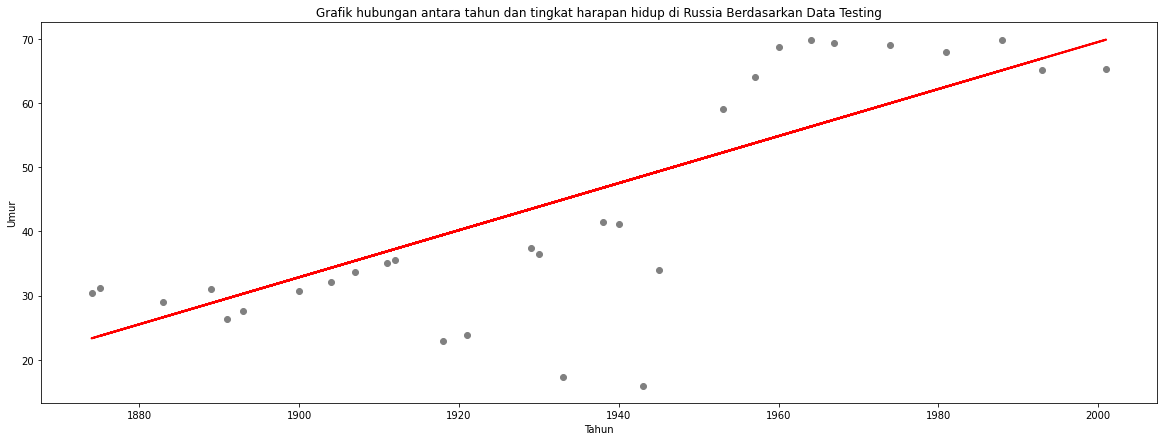

In [74]:
plt.figure(figsize=(20,7))
plt.xlabel("Tahun")
plt.ylabel("Umur")
plt.title("Grafik hubungan antara tahun dan tingkat harapan hidup di Russia Berdasarkan Data Testing")

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

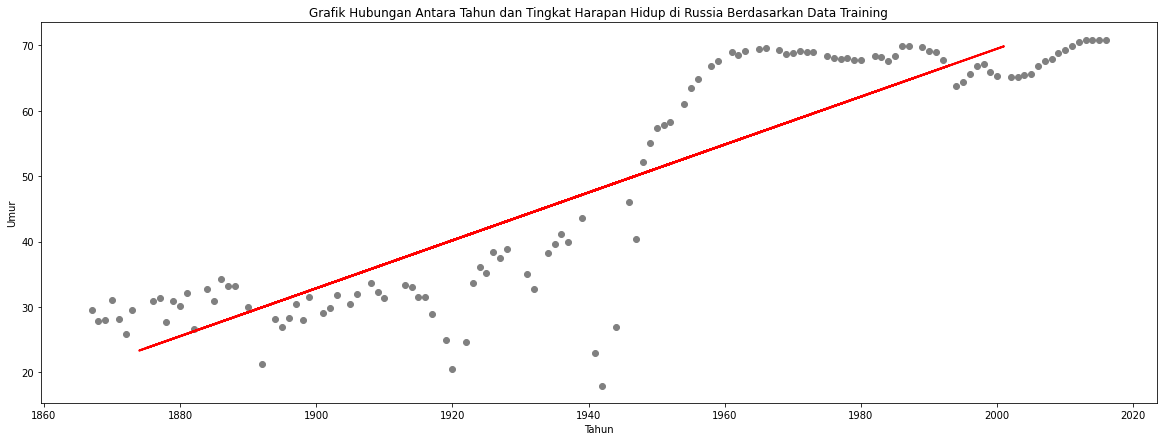

In [75]:
plt.figure(figsize=(20,7))
plt.xlabel("Tahun")
plt.ylabel("Umur")
plt.title("Grafik Hubungan Antara Tahun dan Tingkat Harapan Hidup di Russia Berdasarkan Data Training")

plt.scatter(X_train, y_train,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.342488164158471
Mean Squared Error: 124.9317989885232
Root Mean Squared Error: 11.177289429397595


In [30]:
print("Accuracy: ", regresi.score(X_train, y_train))

Accuracy:  0.8043522051431526


In [48]:
print("Anda ingin menebak umur max di tahun tertentu?")
tahun = input('Masukkan Tahun:')

tebakan = regresi.predict([[tahun]])
print("Angka harapan hidup/umur maksimal pada tahun tersebut di Russia adalah", int(tebakan[0]), "Tahun")

Anda ingin menebak umur max di tahun tertentu?
Masukkan Tahun:2014
Angka harapan hidup/umur maksimal pada tahun tersebut di Russia adalah 74 Tahun


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
